In [2]:
## importing the required libraries ###
import pandas as pd
import matplotlib as plt
import numpy as np

In [3]:
## reading the data ##
df = pd.read_csv("C://Users//NNithaksha//Desktop//PROJECT_College_Place_working//collegePlace.csv")


In [4]:
df.shape

(2966, 8)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [6]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Age  Gender  Stream  Internships   CGPA  Hostel  HistoryOfBacklogs  \
0     False   False   False        False  False   False              False   
1     False   False   False        False  False   False              False   
2     False   False   False        False  False   False              False   
3     False   False   False        False  False   False              False   
4     False   False   False        False  False   False              False   
...     ...     ...     ...          ...    ...     ...                ...   
2961  False   False   False        False  False   False              False   
2962  False   False   False        False  False   False              False   
2963  False   False   False        False  False   False              False   
2964  False   False   False        False  False   False              False   
2965  False   False   False        False  False   False              False   

 

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2961     True
2962     True
2963     True
2964     True
2965     True
Length: 2966, dtype: bool

In [8]:
###dropping the duplicates ###
df_unique = df.drop_duplicates()
print(df_unique)

      Age  Gender                         Stream  Internships  CGPA  Hostel  \
0      22    Male  Electronics And Communication            1     8       1   
1      21  Female               Computer Science            0     7       1   
2      22  Female         Information Technology            1     6       0   
3      21    Male         Information Technology            0     8       0   
4      22    Male                     Mechanical            0     8       1   
...   ...     ...                            ...          ...   ...     ...   
2946   23    Male         Information Technology            1     7       1   
2952   23    Male                     Mechanical            0     8       1   
2954   23  Female               Computer Science            1     8       0   
2958   23    Male               Computer Science            0     6       0   
2960   23    Male                     Mechanical            1     7       1   

      HistoryOfBacklogs  PlacedOrNot  
0           

In [9]:
## feature extraction ###
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [10]:
X,Y = make_classification(n_samples = 500, n_features = 7,random_state = 42 )

In [11]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

model = LogisticRegression() 

In [12]:
sfs = SFS(model,k_features=7,forward=True,floating=False,cv=0)
sfs = sfs.fit(X_train,y_train)

In [13]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

C:\Users\NNithaksha\anaconda3\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\NNithaksha\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)",[0.885],0.885,"(1,)",NaN,0.0,NaN
2,"(0, 1)",[0.8925],0.8925,"(0, 1)",NaN,0.0,NaN
3,"(0, 1, 5)",[0.8925],0.8925,"(0, 1, 5)",NaN,0.0,NaN
4,"(0, 1, 3, 5)",[0.8925],0.8925,"(0, 1, 3, 5)",NaN,0.0,NaN
5,"(0, 1, 3, 5, 6)",[0.8925],0.8925,"(0, 1, 3, 5, 6)",NaN,0.0,NaN
6,"(0, 1, 3, 4, 5, 6)",[0.89],0.89,"(0, 1, 3, 4, 5, 6)",NaN,0.0,NaN
7,"(0, 1, 2, 3, 4, 5, 6)",[0.8825],0.8825,"(0, 1, 2, 3, 4, 5, 6)",NaN,0.0,NaN


In [14]:
df_unique.drop(columns=['Hostel','HistoryOfBacklogs'],inplace=True)

C:\Users\NNithaksha\AppData\Local\Temp\ipykernel_22268\1908609957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.drop(columns=['Hostel','HistoryOfBacklogs'],inplace=True)


In [15]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 0 to 2960
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1137 non-null   int64 
 1   Gender       1137 non-null   object
 2   Stream       1137 non-null   object
 3   Internships  1137 non-null   int64 
 4   CGPA         1137 non-null   int64 
 5   PlacedOrNot  1137 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 62.2+ KB


In [16]:
def cgpa(x):
    if x == 10:
        print("Able to apply for dream")
    elif x == 8 or x == 9:
        print("Able to apply for core")
    else:
        print("Cannot apply")
    return x


df_unique["CGPA"] = df_unique["CGPA"].apply(cgpa)

Able to apply for core
Cannot apply
Cannot apply
Able to apply for core
Able to apply for core
Cannot apply
Cannot apply
Cannot apply
Cannot apply
Cannot apply
Cannot apply
Able to apply for core
Cannot apply
Able to apply for core
Able to apply for core
Cannot apply
Cannot apply
Cannot apply
Able to apply for core
Cannot apply
Cannot apply
Cannot apply
Cannot apply
Able to apply for core
Able to apply for core
Able to apply for core
Cannot apply
Able to apply for core
Cannot apply
Cannot apply
Cannot apply
Cannot apply
Cannot apply
Cannot apply
Able to apply for core
Cannot apply
Able to apply for core
Cannot apply
Able to apply for core
Cannot apply
Able to apply for core
Cannot apply
Cannot apply
Cannot apply
Cannot apply
Able to apply for core
Able to apply for core
Able to apply for core
Cannot apply
Cannot apply
Able to apply for core
Able to apply for core
Able to apply for core
Able to apply for core
Able to apply for core
Able to apply for core
Able to apply for core
Able to a

C:\Users\NNithaksha\AppData\Local\Temp\ipykernel_22268\2360439457.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique["CGPA"] = df_unique["CGPA"].apply(cgpa)


In [17]:
df_unique["Stream"].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [18]:
#sfrom sklearn.preprocessing import LabelEncoder

# Get all unique labels in the 'Education' column (assuming df is your DataFrame)
''''unique_education_labels = df['Stream'].unique()

# Fit the LabelEncoder with all possible labels
s = LabelEncoder()
s.fit(unique_education_labels)'''

"'unique_education_labels = df['Stream'].unique()\n\n# Fit the LabelEncoder with all possible labels\ns = LabelEncoder()\ns.fit(unique_education_labels)"

In [19]:
def stream(y):
    if 'Electrical' in y:
        return 'Electrical'
    if 'Electronics And Communication' in y:
        return 'Electronics And Communication'
    if 'Computer Science' in y:
        return 'Computer Science'
    if 'Information Technology' in y:
        return 'Information Technology'
    if 'Mechanical' in y:
        return 'Mechanical'
    if 'Civil' in y:
        return 'Civil'
    
    

df_unique["Stream"] = df_unique["Stream"].apply(stream)

C:\Users\NNithaksha\AppData\Local\Temp\ipykernel_22268\1040310450.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique["Stream"] = df_unique["Stream"].apply(stream)


In [20]:
df_unique["Stream"].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder 
s = LabelEncoder()
s.fit(['Electronics And Communication', 'Computer Science','Information Technology', 'Mechanical', 'Electrical', 'Civil']) 

df_unique = df_unique.copy()  # Creates a deep copy


# Apply the encoder to the Gender column
df_unique.loc[:, "Stream"] = s.fit_transform(df_unique["Stream"])

# Use .loc to explicitly set the transformed values in the "Gender" column
# df_unique.loc[:, "Gender"] = a.fit_transform(df_unique["Gender"])
df_unique["Stream"]

C:\Users\NNithaksha\AppData\Local\Temp\ipykernel_22268\4018476346.py:9: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_unique.loc[:, "Stream"] = s.fit_transform(df_unique["Stream"])


0       3
1       1
2       4
3       4
4       5
       ..
2946    4
2952    5
2954    1
2958    1
2960    5
Name: Stream, Length: 1137, dtype: int32

In [22]:
from sklearn.preprocessing import LabelEncoder 

# Initialize the LabelEncoder
a = LabelEncoder()
a.fit(['Male', 'Female']) 

df_unique = df_unique.copy()  # Creates a deep copy


# Apply the encoder to the Gender column
df_unique.loc[:, "Gender"] = a.fit_transform(df_unique["Gender"])

# Use .loc to explicitly set the transformed values in the "Gender" column
# df_unique.loc[:, "Gender"] = a.fit_transform(df_unique["Gender"])
df_unique["Gender"]

C:\Users\NNithaksha\AppData\Local\Temp\ipykernel_22268\330326559.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_unique.loc[:, "Gender"] = a.fit_transform(df_unique["Gender"])


0       1
1       0
2       0
3       1
4       1
       ..
2946    1
2952    1
2954    0
2958    1
2960    1
Name: Gender, Length: 1137, dtype: int32

In [23]:
x = df_unique.iloc[:,[1,2,3,4]]
print(x)
y = df_unique.iloc[:,5]
print(y)

      Gender  Stream  Internships  CGPA
0          1       3            1     8
1          0       1            0     7
2          0       4            1     6
3          1       4            0     8
4          1       5            0     8
...      ...     ...          ...   ...
2946       1       4            1     7
2952       1       5            0     8
2954       0       1            1     8
2958       1       1            0     6
2960       1       5            1     7

[1137 rows x 4 columns]
0       1
1       1
2       1
3       1
4       1
       ..
2946    0
2952    1
2954    1
2958    0
2960    0
Name: PlacedOrNot, Length: 1137, dtype: int64


In [24]:
#Splitting the dataset into training and testing data 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) 


In [25]:
#Feature scaling for accurate predictions 
from sklearn.preprocessing import StandardScaler 
st = StandardScaler() 

In [26]:
x_train = st.fit_transform(x_train) 
x_test = st.transform(x_test)

In [27]:
from sklearn.svm import SVC
SVM = SVC() 
SVM.fit(x_train,y_train)

SVC()

In [28]:
#prediction 
y_pred = SVM.predict(x_test) 

In [29]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred) 
print(cm) 

[[134  19]
 [ 59 130]]


Accuracy:  0.7719298245614035


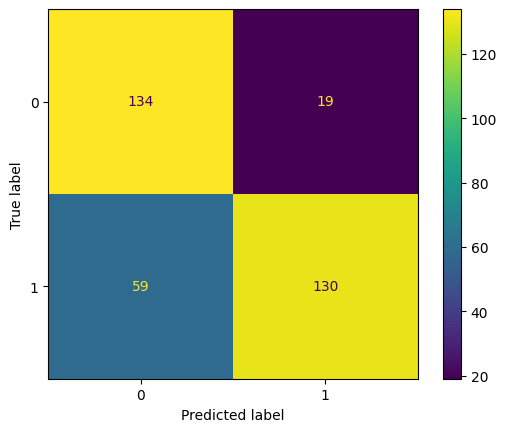

In [30]:
from sklearn import metrics 
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred)) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0,1]) 
cm_display.plot() 

In [31]:
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(criterion="entropy", random_state=42) 
classifier.fit(x_train,y_train)  


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [32]:
#Predicting the values 
y_pred = classifier.predict(x_test) 
#print(y_pred)
#x_test = classifier.predict(x_train)
#print(x_test)

In [33]:
#Calculating accuracy score 
model = classifier.score(x,y) 
print(model) 


0.5795954265611257


C:\Users\NNithaksha\anaconda3\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [34]:
#Accuracy of the model 
#Test of accuracy - "Confusion Matrix" 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred) 
print(cm)

[[129  24]
 [ 57 132]]


In [35]:
from sklearn import metrics 
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1]) 

Accuracy:  0.7631578947368421


In [36]:
#Import Logistic Regression classifier to build the model 
from sklearn.linear_model import LogisticRegression 
reg = LogisticRegression() 
reg.fit(x_train,y_train)

LogisticRegression()

In [37]:

#Predict the outcome 
y_pred = reg.predict(x_test) 
print(y_pred)
x_pred = reg.predict(x_train) 
print(y_test)

[1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1
 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0
 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0
 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1
 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0
 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 1 0 1 0 0 1 1]
1644    1
912     0
780     0
1782    0
1356    1
       ..
736     0
1060    1
172     1
1695    0
2111    1
Name: PlacedOrNot, Length: 342, dtype: int64


In [38]:
#Accuracy of the model
from sklearn import metrics 
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred)) 

Accuracy:  0.6666666666666666


In [39]:
from sklearn.cluster import KMeans
classifier = KMeans(n_clusters=2) 
classifier.fit(x_train,y_train)

KMeans(n_clusters=2)

In [40]:
y_pred = classifier.predict(x_test) 



In [41]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred) 
print(cm) 



[[ 55  98]
 [105  84]]


Accuracy:  0.4064327485380117


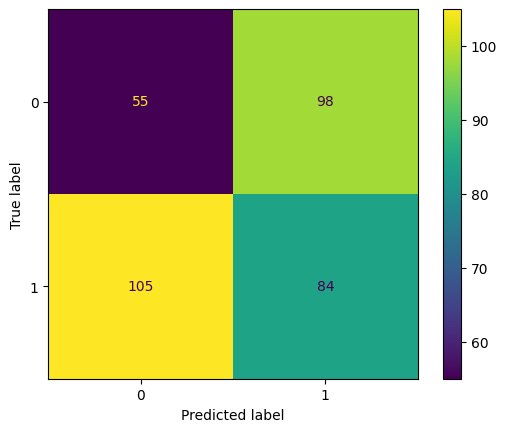

In [42]:
from sklearn import metrics 
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred)) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0,1]) 
cm_display.plot() 


In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) 
classifier.fit(x_train,y_train)



KNeighborsClassifier()

In [44]:
#prediction 
y_pred = classifier.predict(x_test) 



In [45]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred) 
print(cm) 



[[115  38]
 [ 41 148]]


Accuracy:  0.7690058479532164


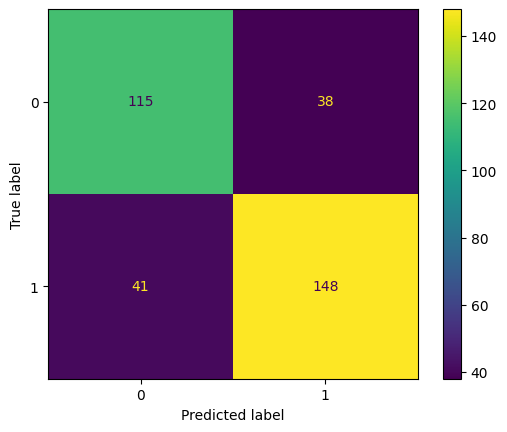

In [46]:
from sklearn import metrics 
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred)) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0,1]) 
cm_display.plot() 

In [47]:
import pickle

In [48]:
data = {"Model": SVM,"Gender": a,"Stream": s }


In [49]:
with open('saved_steps1.pkl', 'wb') as file:
    pickle.dump(data, file)
    

In [50]:
with open('saved_steps1.pkl', 'rb') as file:

    data = pickle.load(file)

SVM_loaded = data["Model"]

a = data["Gender"]

s = data["Stream"]

y_pred = SVM.predict(x_test)

y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [51]:
from sklearn import metrics 
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred)) 

Accuracy:  0.7719298245614035
